Unless otherwise specified, all experiments run with parameters:

* episode length = 1000
* max search depth = 4
* rollout policy (where applicable) = best arm
* discount (where applicable) = 0.99
* number items = 3
* state space granularity = 3
* teacher to query (where applicable) = 2
* reward range shift = -2
* seed = 1

on state ids:

* 1217
* 1226
* 1235
* 1245
* 4586
* 4589
* 4629
* 4638
* 4641
* 1572
* 1712
* 3191
* 3204
* 3437
* 3446
* 3514
* 3526
* 3616
* 4151
* 4426

In [1]:
from utils.fig import *
from utils.beliefs import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Experiment parameters
runs = 25
actions = ["C1", "C2", "C3", "C4", "B1", "B2", "B3", "B"]
ai, af, pi, pf = "active infinite", "active finite", "passive infinite", "passive finite"
n50, n100, n200 = "naive-50", "naive-100", "naive-200"
ra, rr = "random arms", "random"

# Plotting Parameters
labels = [ai, af, pi, pf, n50, n100, n200, ra, rr]
discount = 0.99
window = 10
;

''

In [3]:
# Import action and reward data (fast)

# ai: active infinite
ids_ai = ["active_infinite_23422_131424", "active_infinite_23419_153324", "active_infinite_23419_154231", "active_infinite_23419_155139", "active_infinite_23419_160549", "active_infinite_23419_161648", "active_infinite_23419_162359", "active_infinite_23419_163115", "active_infinite_23419_16401", "active_infinite_23419_164925", "active_infinite_23419_17049", "active_infinite_23419_171313", "active_infinite_23419_172230", "active_infinite_23419_172929", "active_infinite_23419_17394", "active_infinite_23419_174759", "active_infinite_23419_180013", "active_infinite_23419_181126", "active_infinite_23419_182029", "active_infinite_23419_183010"]
data_ai = import_csv(ids_ai, runs)

# af: active finite
ids_af = ["active_finite_23419_214856", "active_finite_23419_22017", "active_finite_23419_22124", "active_finite_23419_222216", "active_finite_23419_223627", "active_finite_23419_22505", "active_finite_23419_230052", "active_finite_23419_230927", "active_finite_23419_232011", "active_finite_23419_233116", "active_finite_23419_23426", "active_finite_23419_235054", "active_finite_23420_000135", "active_finite_23420_001238", "active_finite_23420_002515", "active_finite_23420_004012", "active_finite_23420_00540", "active_finite_23420_010552", "active_finite_23420_011651", "active_finite_23420_012749"]
data_af = import_csv(ids_af, runs)

# pi: passive infinite
ids_pi = ["passive_infinite_23419_183940", "passive_infinite_23419_184948", "passive_infinite_23419_18573", "passive_infinite_23419_191144", "passive_infinite_23419_193217", "passive_infinite_23419_194023", "passive_infinite_23419_194838", "passive_infinite_23419_195741", "passive_infinite_23419_200444", "passive_infinite_23419_201343", "passive_infinite_23419_202155", "passive_infinite_23419_203025", "passive_infinite_23419_203934", "passive_infinite_23419_205227", "passive_infinite_23419_205917", "passive_infinite_23419_210814", "passive_infinite_23419_211748", "passive_infinite_23419_21258", "passive_infinite_23419_213346", "passive_infinite_23419_214029"]
data_pi = import_csv(ids_pi, runs)

# pf: passive finite
ids_pf = ["passive_finite_23422_141255", "passive_finite_23422_142713", "passive_finite_23422_143917", "passive_finite_23422_145237", "passive_finite_23422_150344", "passive_finite_23422_151540", "passive_finite_23422_152710", "passive_finite_23422_153914", "passive_finite_23422_155019", "passive_finite_23422_16003", "passive_finite_23422_161248", "passive_finite_23422_162128", "passive_finite_23422_163156", "passive_finite_23422_164250", "passive_finite_23422_165540", "passive_finite_23422_17041", "passive_finite_23422_17148", "passive_finite_23422_172518", "passive_finite_23422_173548", "passive_finite_23422_174423"]
data_pf = import_csv(ids_pf, runs)

# n50: naive w/50 exploration steps
ids_n50 = ["naive_50_23420_013912", "naive_50_23420_013928", "naive_50_23420_013944", "naive_50_23420_01401", "naive_50_23420_014017", "naive_50_23420_014034", "naive_50_23420_014050", "naive_50_23420_01417", "naive_50_23420_014123", "naive_50_23420_014139", "naive_50_23420_014156", "naive_50_23420_014213", "naive_50_23420_014230", "naive_50_23420_014247", "naive_50_23420_01433", "naive_50_23420_014320", "naive_50_23420_014336", "naive_50_23420_014352", "naive_50_23420_01448", "naive_50_23420_014424"]
data_n50 = import_csv(ids_n50, runs)

# n100: naive w/100 exploration steps
ids_n100 = ["naive_100_23420_014440", "naive_100_23420_014457", "naive_100_23420_014513", "naive_100_23420_014529", "naive_100_23420_014545", "naive_100_23420_01462", "naive_100_23420_014618", "naive_100_23420_014634", "naive_100_23420_014650", "naive_100_23420_01476", "naive_100_23420_014722", "naive_100_23420_014739", "naive_100_23420_014755", "naive_100_23420_014811", "naive_100_23420_014827", "naive_100_23420_014843", "naive_100_23420_01490", "naive_100_23420_014916", "naive_100_23420_014932", "naive_100_23420_014948"]
data_n100 = import_csv(ids_n100, runs)

# n200: naive w/200 exploration steps
ids_n200 = ["naive_200_23420_01504", "naive_200_23420_015021", "naive_200_23420_015037", "naive_200_23420_015053", "naive_200_23420_01519", "naive_200_23420_015125", "naive_200_23420_015142", "naive_200_23420_015158", "naive_200_23420_015215", "naive_200_23420_015231", "naive_200_23420_015247", "naive_200_23420_01534", "naive_200_23420_015320", "naive_200_23420_015336", "naive_200_23420_015352", "naive_200_23420_01549", "naive_200_23420_015425", "naive_200_23420_015441", "naive_200_23420_015457", "naive_200_23420_015514"]
data_n200 = import_csv(ids_n200, runs)

# ra: random arms
ids_ra = ["arms_23420_015531", "arms_23420_015549", "arms_23420_01568", "arms_23420_015626", "arms_23420_015645", "arms_23420_01573", "arms_23420_015722", "arms_23420_015740", "arms_23420_015759", "arms_23420_015817", "arms_23420_015835", "arms_23420_015854", "arms_23420_015912", "arms_23420_015931", "arms_23420_015949", "arms_23420_02007", "arms_23420_020026", "arms_23420_020044", "arms_23420_02013", "arms_23420_020121"]
data_ra = import_csv(ids_ra, runs)

# rr: random
ids_rr = ["random_23422_175947", "random_23422_18006", "random_23422_180025", "random_23422_180044", "random_23422_18014", "random_23422_180122", "random_23422_180141", "random_23422_180159", "random_23422_180218", "random_23422_180237", "random_23422_180256", "random_23422_180315", "random_23422_180334", "random_23422_180353", "random_23422_180412", "random_23422_180431", "random_23422_180450", "random_23422_18058", "random_23422_180527", "random_23422_180547"]
data_rr = import_csv(ids_rr, runs)

data = [data_ai, data_af, data_pi, data_pf, data_n50, data_n100, data_n200, data_ra, data_rr]
;

''

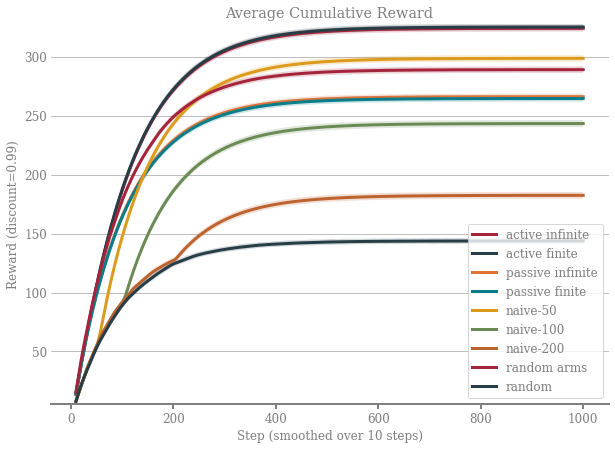

In [4]:
plot_r(data, labels, discount, window)       

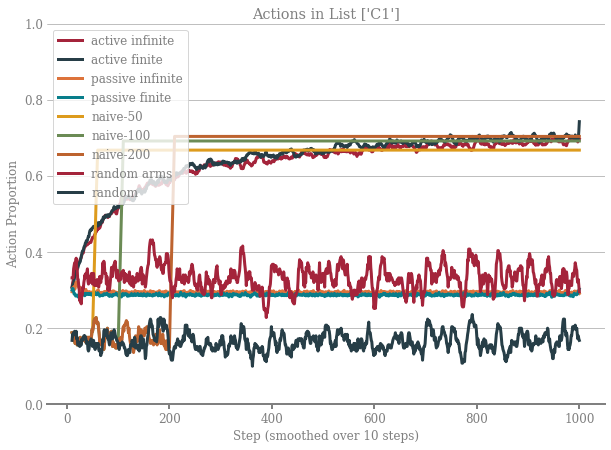

In [5]:
plot_best_arm_actions(data, labels, window)

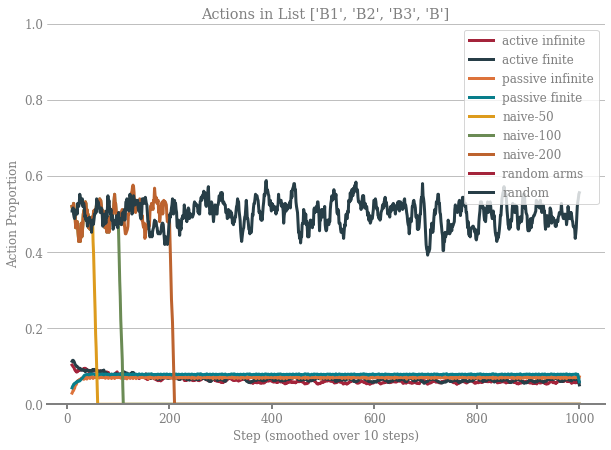

In [6]:
plot_teacher_actions(data, labels, window)

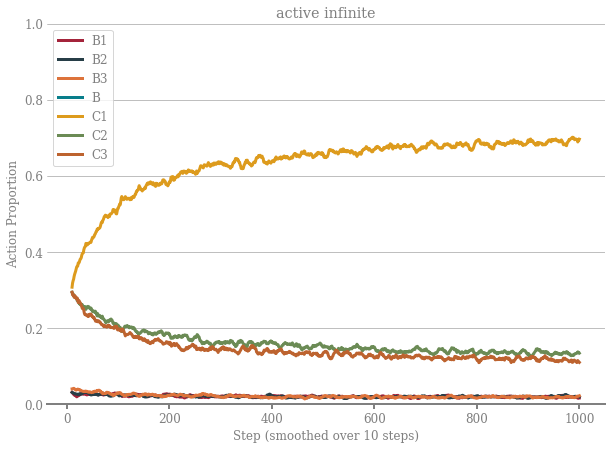

In [7]:
plot_actions(data_ai, ai, window)

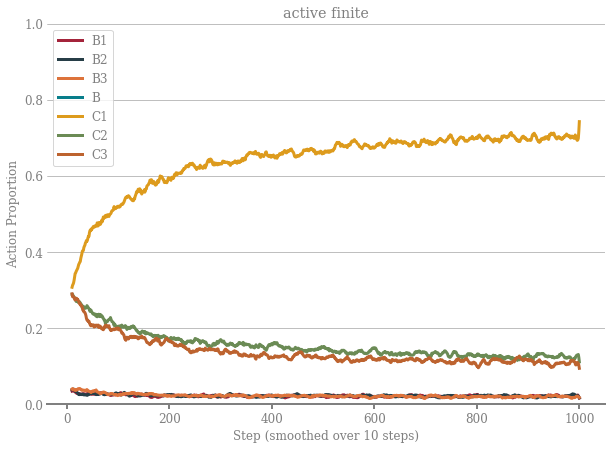

In [8]:
plot_actions(data_af, af, window)

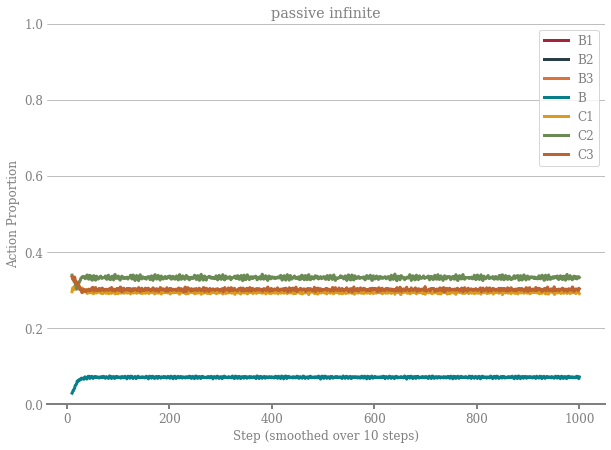

In [9]:
plot_actions(data_pi, pi, window)

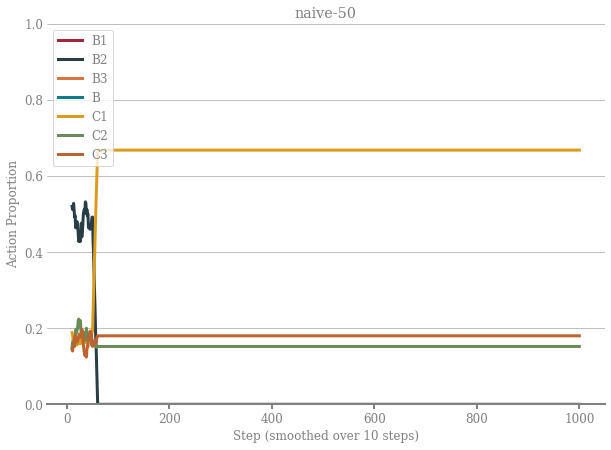

In [10]:
plot_actions(data_n50, n50, window)

In [11]:
# Import belief data (takes ~45m)
labels = [ai, af, pi, pf]
ids = [ids_ai, ids_af, ids_pi, ids_pf]

start = time.time()
print("importing data...")
belief_data = import_jsons(ids, labels)
end = time.time()
exps = len(labels)

states = len(belief_data[labels[0]].keys())
runs = len(belief_data[labels[0]][ids_ai[0]]) 
steps = len(belief_data[labels[0]][ids_ai[0]][0]) # assumes all runs have same number of steps
print(f"imported {exps} experiments with {states} state ids, {runs} runs and {steps} steps each in {end-start} seconds")

start = time.time()
print("converting keys to State objects...")
belief_data = convert_keys_to_state_from_dict(belief_data)
end = time.time()
print(f"converted keys to State objects for {exps}x{states}x{runs}x{steps} steps in {round((end-start)/60, 1)} minutes")


importing data...
imported 4 experiments with 20 state ids, 25 runs and 1000 steps each in 41.562875747680664 seconds
converting keys to State objects...
converting active infinite took 4.62 minutes
converting active finite took 4.68 minutes
converting passive infinite took 14.87 minutes
converting passive finite took 76.53 minutes
converted keys to State objects for 4x20x25x1000 steps in 100.8 minutes


In [12]:
# Import state estimates
labels = [ai, af, pi, pf, n50, n100, n200]
ids = [ids_ai, ids_af, ids_pi, ids_pf, ids_n50, ids_n100, ids_n200]
labels_naive = [n50, n100, n200]
ids_naive = [ids_n50, ids_n100, ids_n200]

# import true states  
start = time.time()
print("importing true states...")
state_actual = import_true_states(ids, labels)
end = time.time()
print(f"imported true states for {exps}x{states} state ids in {(end-start)} seconds")

# get converged states and probabilities for bayesian algorithms (30s)
start = time.time()
print("getting converged states and probabilities...")
state_conv = converged_states(belief_data)
confidence = converged_state_probs(belief_data, state_conv)
end = time.time()
print(f"got converged states and probabilities for {exps}x{states}x{runs} runs in {(end-start)} seconds")

# get estimates states for frequentist/naive algorithms
start = time.time()
print("getting estimated states and probabilities...")
state_est = import_state_estimates(ids_naive, labels_naive)
end = time.time()
print(f"got converged states and probabilities for {len(labels)-exps}x{states}x{runs} runs in {(end-start)} seconds")

# combine converged and estimated states
state_est.update(state_conv)

importing true states...
imported true states for 4x20 state ids in 0.05339789390563965 seconds
getting converged states and probabilities...
got converged states and probabilities for 4x20x25 runs in 29.768195152282715 seconds
getting estimated states and probabilities...
got converged states and probabilities for 3x20x25 runs in 0.4861788749694824 seconds


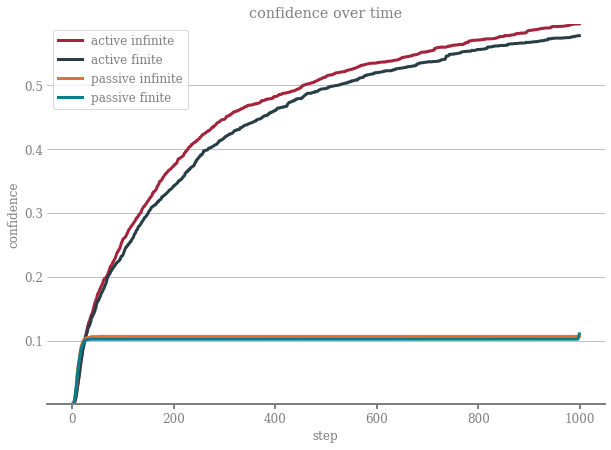

In [13]:
plot_confidence_by_experiment(confidence)

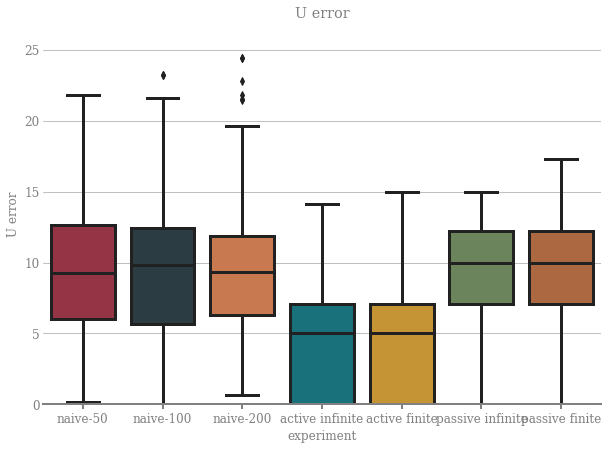

In [14]:
u_error_boxplot(state_est, state_actual)

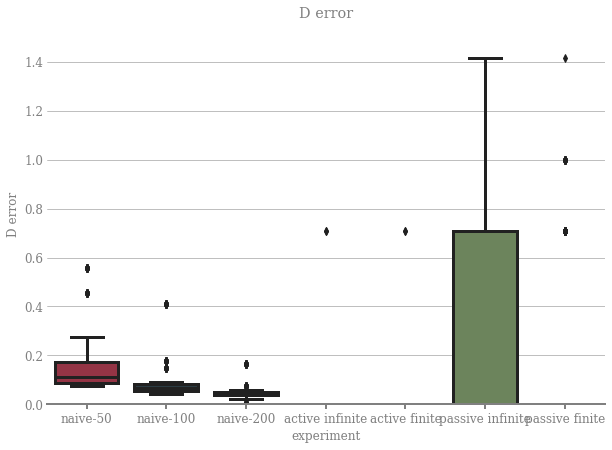

In [15]:
d_error_boxplot(state_est, state_actual)

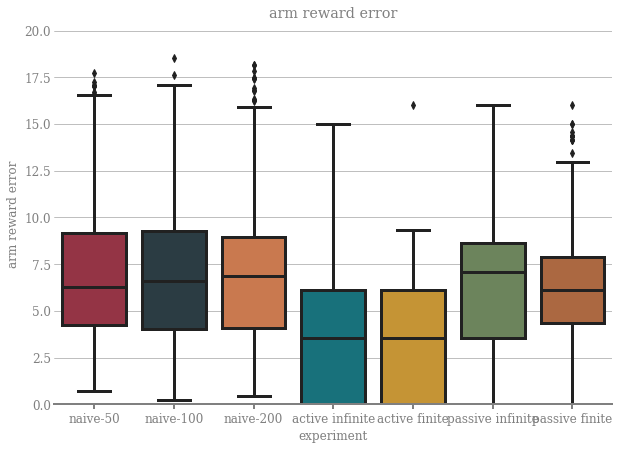

In [16]:
arm_reward_error_boxplot(state_est, state_actual)